# Red Neuronal Convolucional - Perros y Gatos

Continuamos con la implementación de la red neuronal convolucional en Python. Sabemos que una red neuronal convolucional puede aprender a identificar las características relacionadas en un mapa 2D, como las imágenes. En este notebook, resolveremos la tarea de clasificación de imágenes con una CNN.    

Dado un conjunto de imágenes, la tarea consiste en predecir si una imagen contiene un gato o un perro.   

Para ello se va a utilizar el dataset de Kaggle que se encuentra en la siguiente url: https://www.kaggle.com/competitions/dogs-vs-cats/data

## 1. Importamos las librerías necesarias

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2025-03-13 08:43:58.457934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741855438.605302     560 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741855438.645771     560 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 08:43:58.936311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Construcción del modelo de Red Neuronal Convolucional.   

Construcción y compilación del modelo 

In [2]:
cnn_model = Sequential()
# en esta primera capa convolucional se definen 32 filtros de 3x3 y se define el tamaño de la imagen de entrada (64x64x3) donde 3 es el número de canales (RGB)
conv_layer1 = Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)) 
cnn_model.add(conv_layer1)
pool_layer1 = MaxPooling2D(pool_size=(2, 2)) # pool_size=2, 2 hace que la imagen se reduzca a la mitad. El primer 2 es para el eje x y el segundo para el eje y
cnn_model.add(pool_layer1)
conv_layer2 = Conv2D(32, (3, 3), activation='relu') # se definen 32 filtros de 3x3 en la segunda capa convolucional para detectar patrones más complejos
cnn_model.add(conv_layer2)
pool_layer2 = MaxPooling2D(pool_size=(2, 2)) # se vuelve a reducir la imagen a la mitad
cnn_model.add(pool_layer2)
flatten_layer = Flatten() # se aplana la imagen para que pueda ser procesada por una red neuronal. Se convierte en un vector de 1 dimensión.
cnn_model.add(flatten_layer)
dense_layer1 = Dense(units=128, activation='relu') # se define una capa densa de 128 neuronas para procesar la imagen y detectar patrones más complejos
cnn_model.add(dense_layer1)
# se define una capa densa de 1 neurona para clasificar la imagen en dos categorías (gato o perro), usando la función de activación sigmoide por ser un problema de clasificación binaria
dense_layer2 = Dense(units=1, activation='sigmoid') 
cnn_model.add(dense_layer2)

# se compila el modelo con el optimizador Adam, la función de pérdida binary_crossentropy y la métrica accuracy por ser un problema de clasificación binaria.

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-13 08:44:36.509625: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## 3. Resumen del modelo

In [3]:
# Mostramos un resumen del modelo
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Estructura del modelo

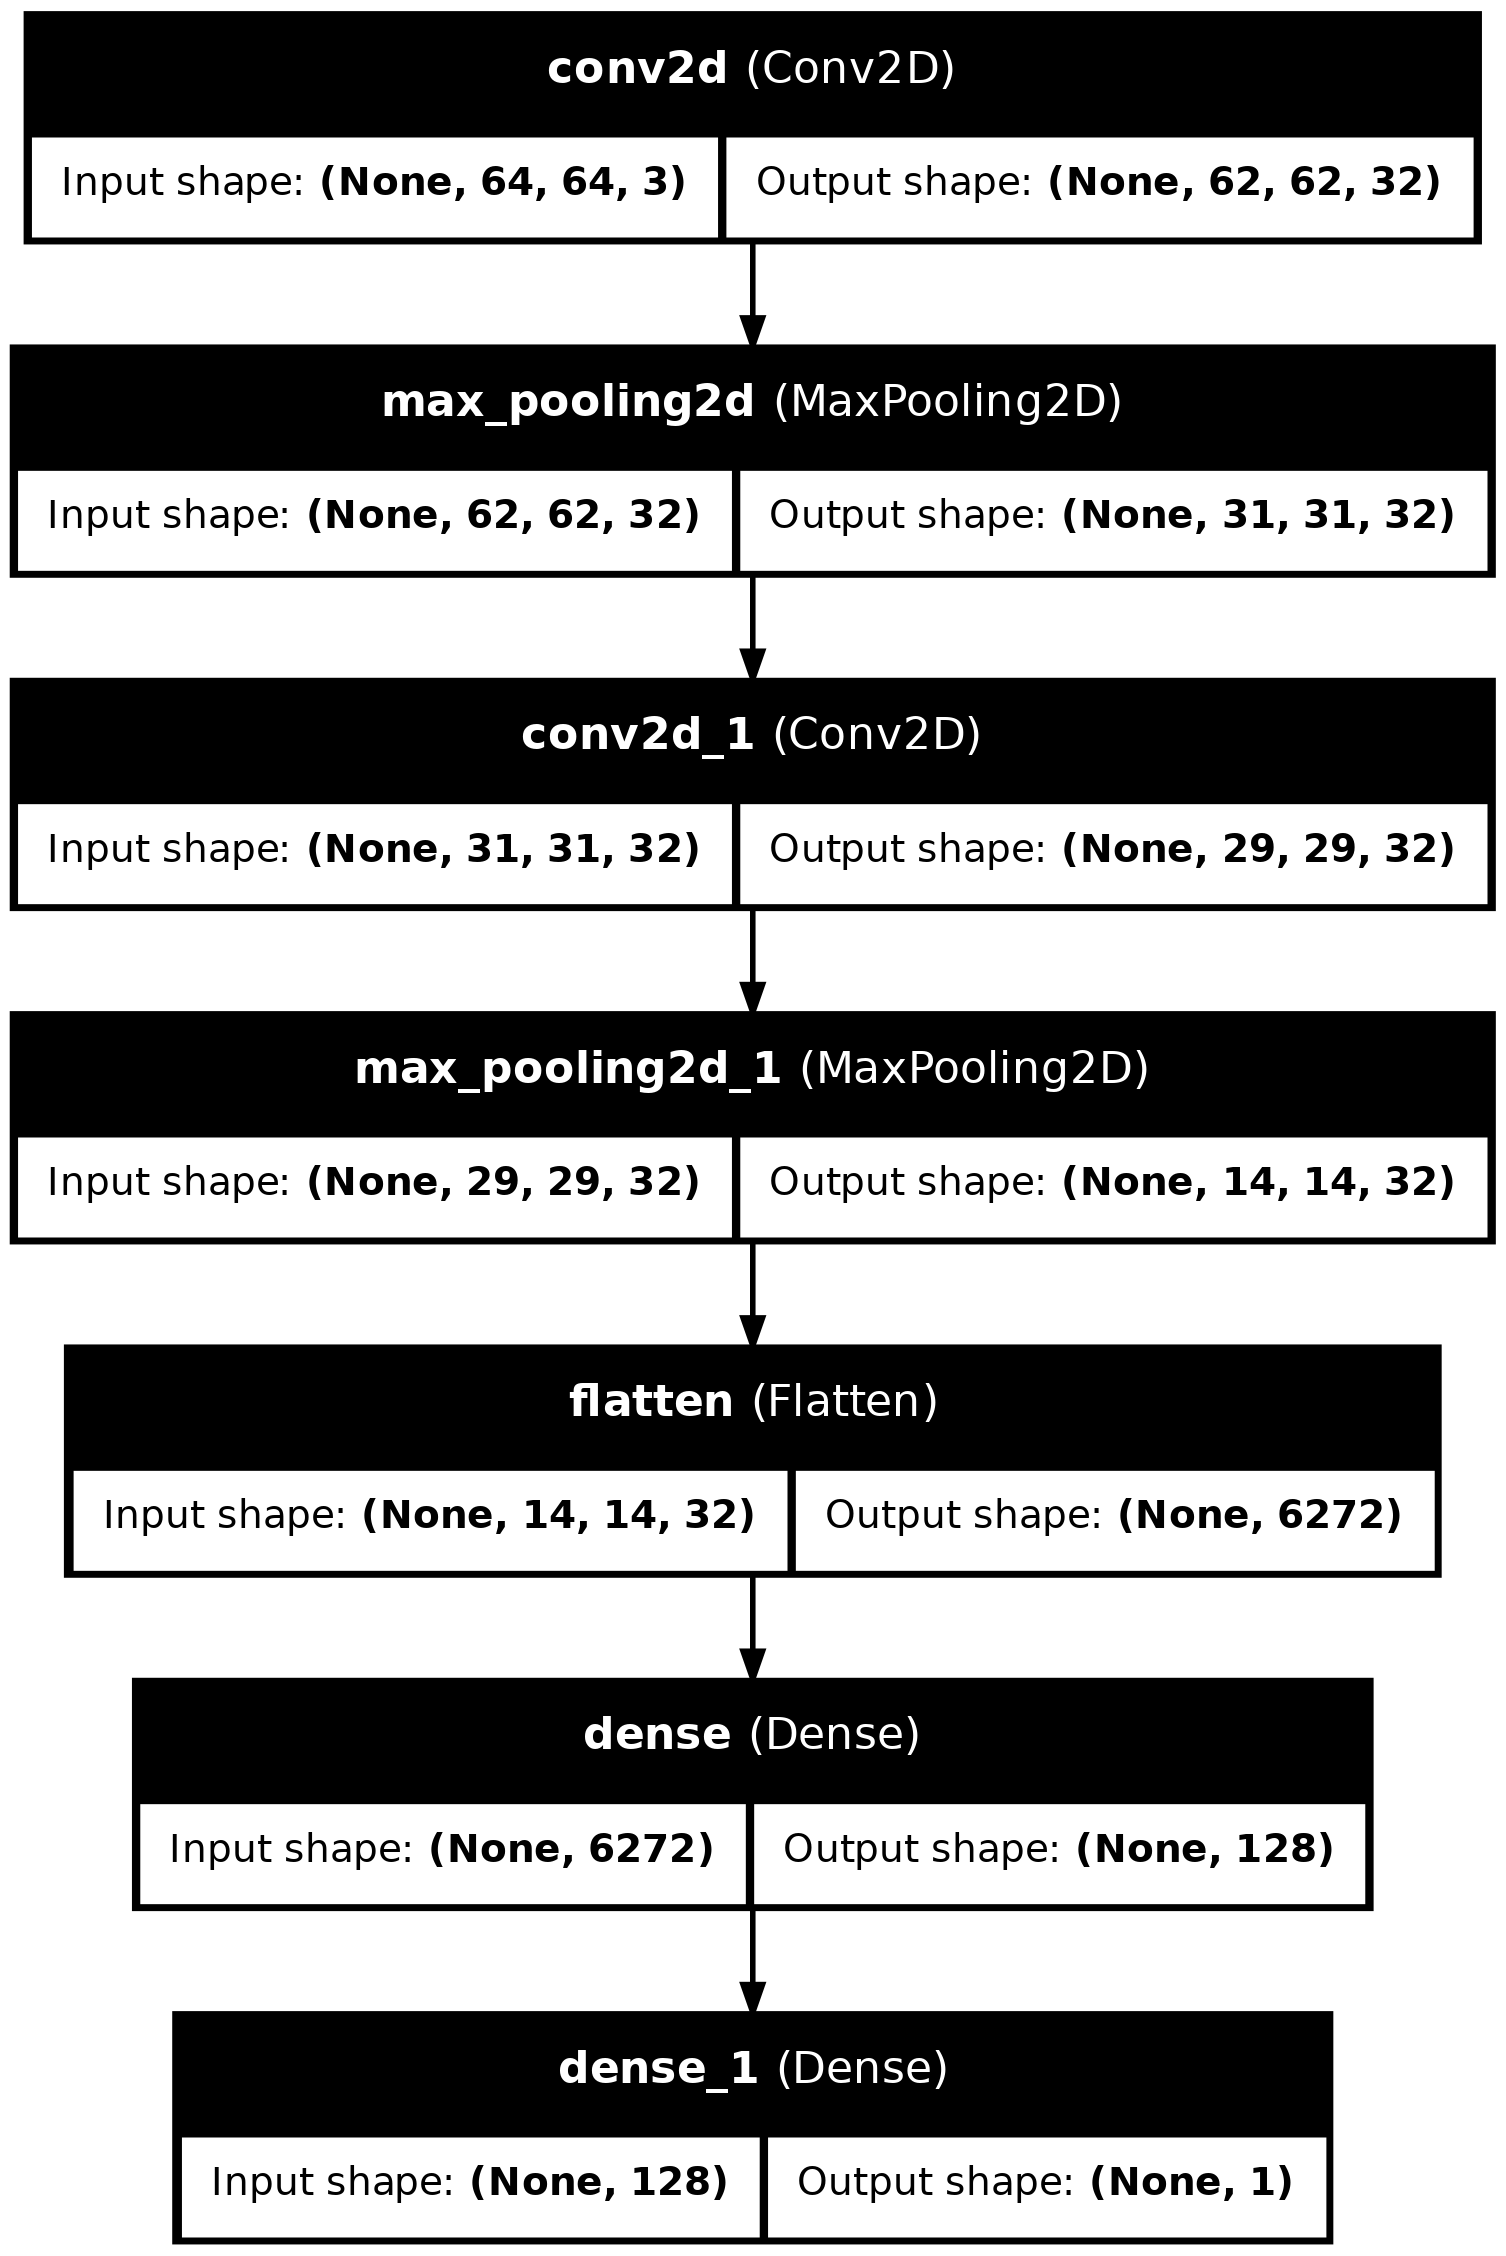

In [4]:
# Graficar el modelo
# pip install pydot
# pip install graphviz
# apt-get install graphviz
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

## 5. Visualización imagen de ejemplo

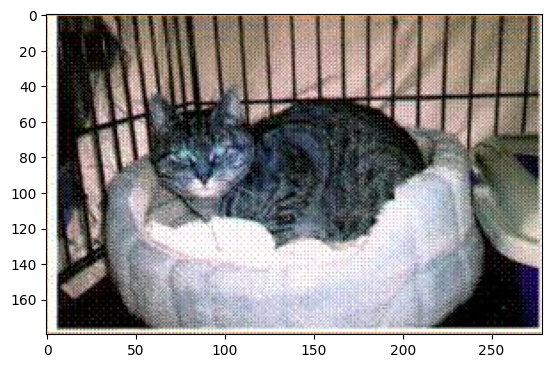

In [24]:
# Visualizar una imagen de ejemplo
import random, os
import cv2 # pip install opencv-python
import matplotlib.pyplot as plt
sample = random.choice(os.listdir('./datasets/catsvsdogs/training_set/cats'))
img = cv2.imread('./datasets/catsvsdogs/training_set/cats/' + sample)
plt.imshow(img)

## 6. Preparación del particionado del conjunto de datos de entrenamiento en train y validation

La siguiente función toma una carpeta con imagenes separadas en dos grupos (ubicados en sendas carpetas) y crea dos carpetas con conjuntos de entrenamiento y validación para poder realizar la generación de imágenes sintéticas.

In [25]:
import os
import shutil
import random

def split_dataset(source_dir, train_dir, val_dir, split_ratio=0.8):
    """
    Divide un conjunto de datos de imágenes en conjuntos de entrenamiento y validación.

    Args:
        source_dir (str): Ruta al directorio fuente.
        train_dir (str): Ruta al directorio de entrenamiento.
        val_dir (str): Ruta al directorio de validación.
        split_ratio (float): Proporción de datos para el conjunto de entrenamiento (por defecto: 0.8).
    """

    for class_name in os.listdir(source_dir):
        class_source_dir = os.path.join(source_dir, class_name)
        if os.path.isdir(class_source_dir):
            class_train_dir = os.path.join(train_dir, class_name)
            class_val_dir = os.path.join(val_dir, class_name)

            os.makedirs(class_train_dir, exist_ok=True)
            os.makedirs(class_val_dir, exist_ok=True)

            files = os.listdir(class_source_dir)
            random.shuffle(files)

            split_index = int(len(files) * split_ratio)
            train_files = files[:split_index]
            val_files = files[split_index:]

            for file_name in train_files:
                source_file = os.path.join(class_source_dir, file_name)
                train_file = os.path.join(class_train_dir, file_name)
                shutil.copy(source_file, train_file)

            for file_name in val_files:
                source_file = os.path.join(class_source_dir, file_name)
                val_file = os.path.join(class_val_dir, file_name)
                shutil.copy(source_file, val_file)

In [26]:
# Rutas de directorios
source_dir = './datasets/catsvsdogs/training_set'
train_dir = './datasets/catsvsdogs/train'
val_dir = './datasets/catsvsdogs/validation'

# Dividir el conjunto de datos
split_dataset(source_dir, train_dir, val_dir)

print(f"Conjunto de datos dividido en:\n- Entrenamiento: {train_dir}\n- Validación: {val_dir}")

Conjunto de datos dividido en:
- Entrenamiento: ./datasets/catsvsdogs/train
- Validación: ./datasets/catsvsdogs/validation


## 7. Data augmentation 

### Construcción de los generadores de datos con [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator), que permite generar lotes de imágenes aumentadas en tiempo real y aplicando transformaciones geométricas 

Creación de los generadores de imágenes sintéticas para entrenamiento y validación

In [ ]:
# Generadores de datos con aumento de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_generator = ImageDataGenerator(rescale=1./255, 
                                     shear_range=0.2, 
                                     zoom_range=0.2, 
                                     horizontal_flip=True)

validation_generator = ImageDataGenerator(rescale=1./255)

Carga de imágenes desde los directorios de train y validation

In [28]:
# Se cargan las imágenes de los directorios de entrenamiento y validación

training_data = train_generator.flow_from_directory('./datasets/catsvsdogs/train', # flow_from_directory() carga las imágenes de un directorio y las divide en lotes
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_data = validation_generator.flow_from_directory('./datasets/catsvsdogs/validation',
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## 8. Entrenamiento del modelo CNN con los datos de entrenamiento y validación
Se usan las imágenes de validación para evaluar el rendimiento del modelo en cada época

In [31]:
# Entrenamiento del modelo
cnn_model.fit(training_data,
            steps_per_epoch=(8000//32), # 8000 imágenes de entrenamiento divididas en lotes de 32 imágenes
            epochs=25,
            validation_data=validation_data,
            validation_steps=(2000//32)) # 2000 imágenes de validación divididas en lotes de 32 imágenes

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 183ms/step - accuracy: 0.6402 - loss: 0.6350 - val_accuracy: 0.6729 - val_loss: 0.5953
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.6822 - loss: 0.5988 - val_accuracy: 0.7228 - val_loss: 0.5506
Epoch 3/25
125/250 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.7247 - loss: 0.5536

/usr/local/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7204 - loss: 0.5556 - val_accuracy: 0.7308 - val_loss: 0.5283
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.7192 - loss: 0.5479 - val_accuracy: 0.7324 - val_loss: 0.5319
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.7377 - loss: 0.5264 - val_accuracy: 0.7268 - val_loss: 0.5512
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7488 - loss: 0.5141 - val_accuracy: 0.7480 - val_loss: 0.5374
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.7511 - loss: 0.4990 - val_accuracy: 0.7596 - val_loss: 0.4856
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - accuracy: 0.7415 - loss: 0.5049 - val_accuracy: 0.7737 - val_loss: 0.4750
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.7579 - loss: 0.4888 - val_accuracy: 0.7596 - val_loss: 0.4999
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.7699 - loss: 0.4837 - val_a

## 9. Predicción con una imagen del conjunto de test

In [49]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Cargar la imagen de prueba y convertirla a un array
test_image = random.choice(os.listdir('./datasets/catsvsdogs/test_set'))
test_image = image.load_img('./datasets/catsvsdogs/test_set/' + test_image, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)



# Realizar la predicción sobre la imagen de prueba
result = cnn_model.predict(test_image)

# Imprimir el resultado de la predicción usando el diccionario de clases
training_data.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
dog


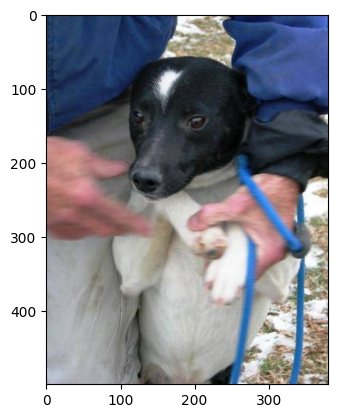

In [50]:
plt.imshow(image.load_img('./datasets/catsvsdogs/test_set/1.jpg'))

## Visualización esquema modelo

/usr/local/lib/python3.11/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


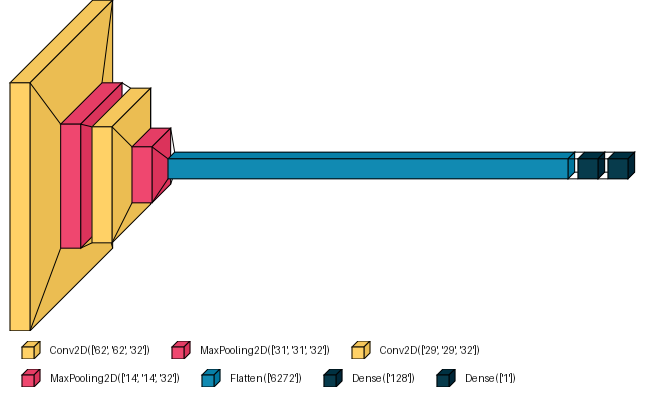

In [51]:



# pip install visualkeras (https://www.kaggle.com/discussions/general/442364)
import visualkeras
# pip install pillow
from PIL import ImageFont 

font = ImageFont.load_default()
visualkeras.layered_view(cnn_model, legend=True, font=font, show_dimension=True).show()